# Part II - Réseau de partage de vélo : Quelles sont les variables qui poussent les clients à se comporter différement ?


## by Mickaël RATISARIJAONA

## Aperçu de l'enquête

Dans cette présentation, nous allons essayer voir le comportement générale des clients, en analysant certaines variables, ensuite, nous allons montrer les variables qui permettent de modifier leur distribution générale en fonction de leur valeur. Pour ce la, nous nous concentrerons sur l'âge des client, la durée d'utilisation des vélos, le type de vélo utilisé et enfin le type de forfait dont le client s'est souscris.


## Aperçu de l'ensemble de données
Cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco : **Ford GoBike**.

Ici donc, nous avons 183 412 données avec 16 variables.

In [1]:
# importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline

# Suppression des messages d'erreur
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importation des données
df = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
# Nettoyage et amélioration du dataset (ajout de certaines variables)
df.dropna(inplace=True) # Suppression des valeurs manquantes

df=df.reset_index()

df["age"] = 2019 - df["member_birth_year"] # Création de la variable âge des clients

df['duration_min'] = df['duration_sec']//60 # Conversion de la durée d'utilisation en minutes

## Distribution de l'âge des clients

Nous avons ici une majorité des clients qui se situe autour de la vingtaines et la trentaine. Mais généralement, l'ensemble des clients ont moins de 60 ans, au delà de cela, ce sont tous des valeurs abérrantes.

Text(0.5, 0, 'Ans')

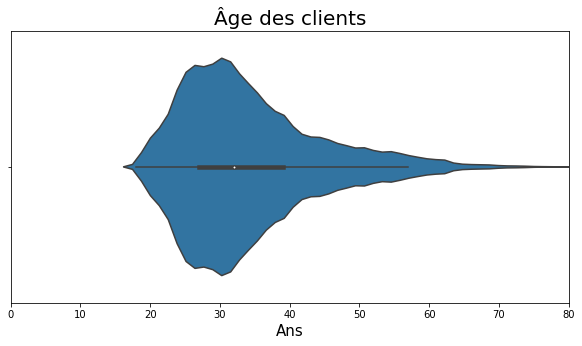

In [4]:
plt.figure(figsize = [10,5])
sb.violinplot(data=df, x='age')

plt.xlim((0,80))
plt.title("Âge des clients",size=20)
plt.xlabel("Ans",size=15)

## Distribution des durées d'utilisation des vélos

Nous avons généralement une durée d'utilisation inférieure à 25 minutes, dont plus de trois quart sont inférieure à 15 minutes.

Text(0.5, 0, 'Minute')

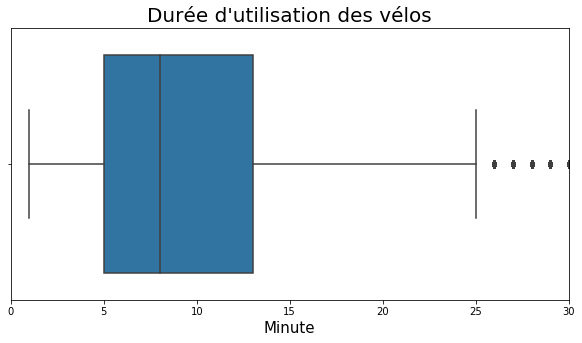

In [5]:
plt.figure(figsize = [10,5])


sb.boxplot(data=df, x='duration_min')
plt.xlim((0,30));
plt.title("Durée d'utilisation des vélos",size=20)
plt.xlabel("Minute",size=15)

## Distribution des types de client selon leur forfait et le type de vélo utilisé

Nous avons une grande majorité des clients qui sont abonnés. Concernant les vélos, la majorité utilise des vélos non partagé. En observant la distribution de ces deux variables, nous pouvons déjà conjecturer qu'il existe une relation entre elles.

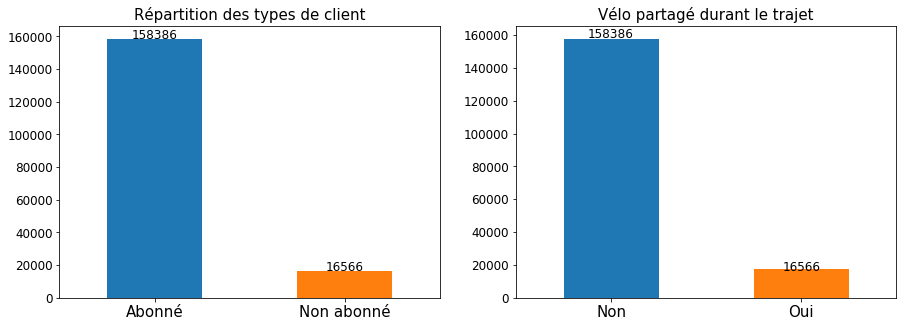

In [6]:
data1 = df['user_type'].value_counts()
data2 = df['bike_share_for_all_trip'].value_counts()

def Plot2(Data,Titre,Label):
    Data.plot(kind='bar')
    xindex = np.arange(len(data1))
    plt.xticks(xindex, labels = Label , size=15,rotation=0)
    plt.title(Titre,size=15)
    for i in range(len(Data)) :
        plt.text(i,data1[i],data1[i], ha="center")

    return None 

# DEUX GRAPHIQUES DANS UNE FIGURE
plt.figure(figsize = [15,5]) 
plt.rcParams['font.size'] = 12

#Graphique de gauche :
plt.subplot(1, 2, 1)
Plot2(data1,"Répartition des types de client",['Abonné', 'Non abonné'])

#Graphique de droite : 
plt.subplot(1, 2, 2)
Plot2(data2,"Vélo partagé durant le trajet",['Non', 'Oui'])

plt.show()

## Relation entre la durée d'utilisation des utilisateurs et le type de forfait qu'ils ont choisi (Abonné ou Non)

Ici, nous observons déjà la différence des comportement des abonnées et des non abonnées par rapport à leur temps d'utilisation. Les non abonnés ont un temps d'utilisation généralement plus élevé (variant de 0 à presque 40 minutes) que celui des abonnés (variant de 0 à moins de 25 minutes)

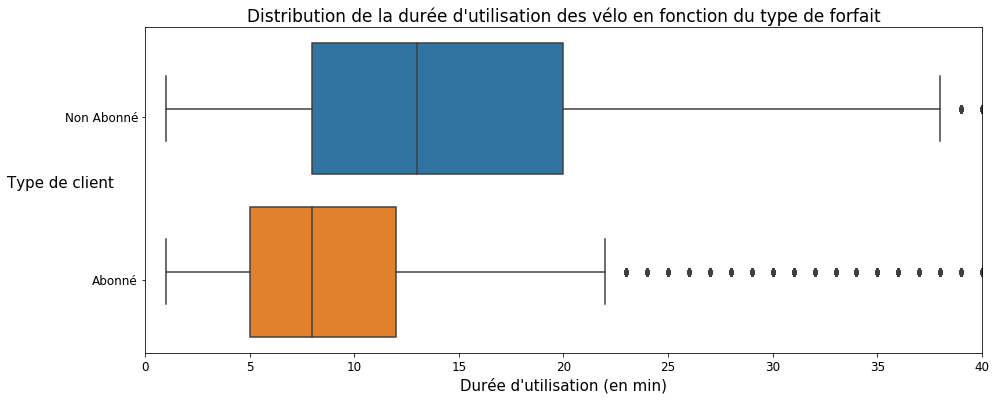

In [7]:
plt.figure(figsize = [15,6]) 
sb.boxplot(data=df,x='duration_min',y='user_type')

#Titre
plt.title("Distribution de la durée d'utilisation des vélo en fonction du type de forfait",size=17)

#Abscisse
plt.xlabel("Durée d'utilisation (en min)",size=15)
plt.xlim(0,40)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non Abonné', 'Abonné']
plt.yticks(locations, labels)
plt.ylabel('Type de client',rotation=0,size=15)

plt.show()

## Relation entre l'âge des clients et le type de vélo utilisé (Partagé ou non)

Nous constatons une concentration de client plus jeune (dans la vingtaine) utilisant les vélos partagés.

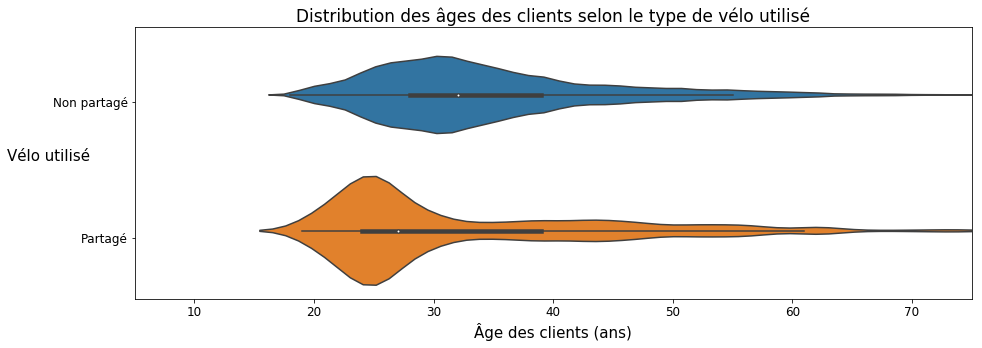

In [9]:
plt.figure(figsize = [15,5]) 
sb.violinplot(data=df,x='age',y='bike_share_for_all_trip')

#Titre
plt.title('Distribution des âges des clients selon le type de vélo utilisé',size=17)

#Abscisse
plt.xlabel('Âge des clients (ans)',size=15)
plt.xlim(5,75)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non partagé', 'Partagé']
plt.yticks(locations, labels)
plt.ylabel('Vélo utilisé',rotation=0,size=15)

plt.show()

## Relation entre la durée d'utilisation par utilisateurs et le type de vélo utilisé (Partagé ou non)

Nous constatons une légère différence entre la distribution des durées d'utilisation des vélos pour les clients utilsant des vélos partagés et d'autres non. Les vélo non partagé ont une répartition légèrement plus élargie dans la durée d'utilisation que ceux qui sont partagé. Ce qui est a priori évident, puisque plus le temps d'utilisation du vélo est élevé, moins le vélo sera réutilisé par autrui.

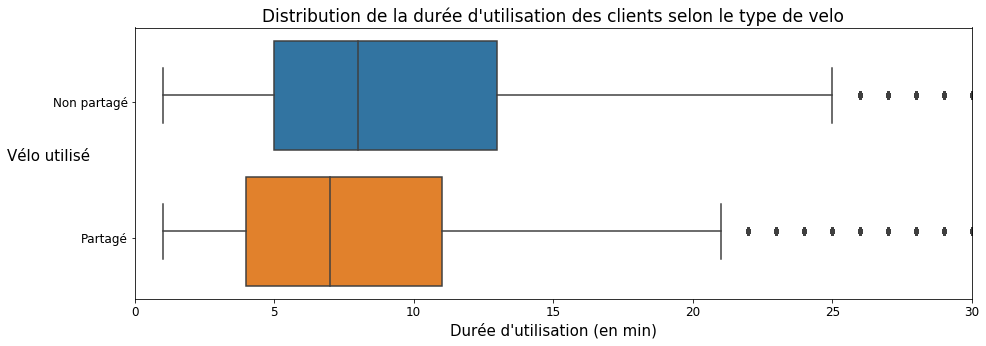

In [10]:
plt.figure(figsize = [15,5]) 
sb.boxplot(data=df,x='duration_min',y='bike_share_for_all_trip')

#Titre
plt.title("Distribution de la durée d'utilisation des clients selon le type de velo",size=17)

#Abscisse
plt.xlabel("Durée d'utilisation (en min)",size=15)
plt.xlim(0,30)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non partagé', 'Partagé']
plt.yticks(locations, labels)
plt.ylabel('Vélo utilisé',rotation=0,size=15)

plt.show()

## Relation entre le type de forfait choisi par le client (Abonné ou non) et le type de vélo utilisé (Partagé ou non)

Nous avons remarqué le type de forfait utilisé et le type de vélo par le client présente des relations très intéressante avec les autres variables. Mais ces deux dernières sont encore plus liées entre elles qu'avec les autres puisque seul les abonnées utilisent les vélos partagés.

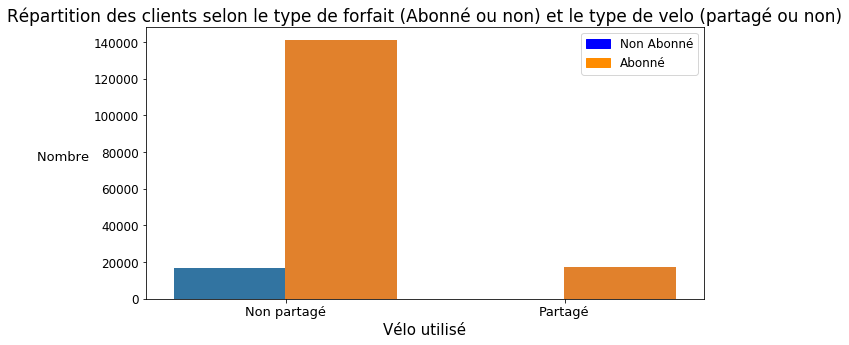

In [11]:
plt.figure(figsize = [10,5]) 
sb.countplot(data=df,x='bike_share_for_all_trip',hue='user_type')
sb.color_palette('bright')
#Titre
plt.title('Répartition des clients selon le type de forfait (Abonné ou non) et le type de velo (partagé ou non)',size=17)

#LEGENDE
NonAbonne = mpatches.Patch(color='blue', label='Non Abonné')
Abonne = mpatches.Patch(color='darkorange', label='Abonné')
plt.legend(handles=[NonAbonne, Abonne])

#Abscisse
locations = np.arange(2)  + 0.01 / 10
labels = ['Non partagé', 'Partagé']
plt.xticks(locations, labels,size=13)
plt.xlabel('Vélo utilisé',rotation=0,size=15)

#Ordonnée
plt.ylabel('Nombre             ',rotation=0,size=13)

plt.show()

## Distribution des âge des clients selon leur choix de partage de velo ainsi que leur type de forfait

La distributions des âges des clients utilisant des vélos non partagé sont à peu près identique, qu'ils soient abonnés ou non. Et comme vu précédémment, seuls les abonnés utilisent les vélos partagés. Et nous observons que la répartition des âges est très dispersé par rapport à ceux qui utilisent des vélos non partagés. Nous remarquons également aussi qu'une majorité des clients abonnées utilisant des vélos partagés, sont majoritairement jeunes (dans les vingtaines, comme mentionné précédemment)

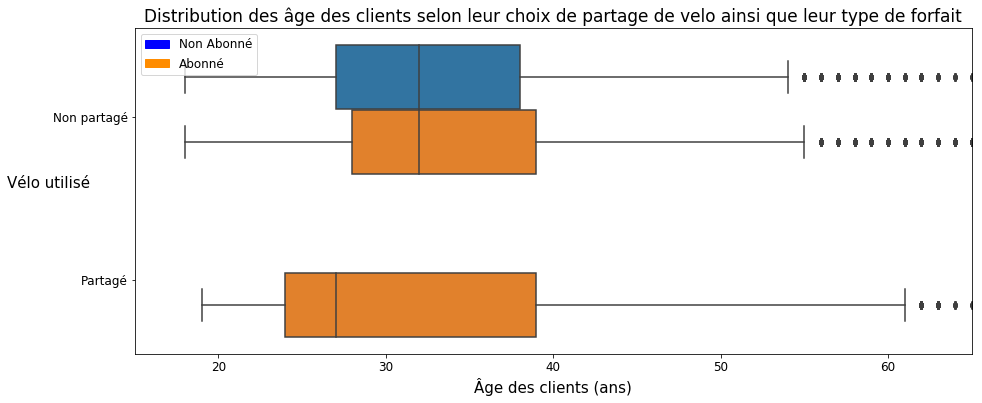

In [12]:
plt.figure(figsize = [15,6]) 
sb.boxplot(data=df, x='age', y='bike_share_for_all_trip', hue = 'user_type')
sb.color_palette('bright')

#LEGENDE
NonAbonne = mpatches.Patch(color='blue', label='Non Abonné')
Abonne = mpatches.Patch(color='darkorange', label='Abonné')
plt.legend(handles=[NonAbonne, Abonne],loc=2)

#Titre
plt.title('Distribution des âge des clients selon leur choix de partage de velo ainsi que leur type de forfait'
          ,size=17)

#Abscisse
plt.xlabel('Âge des clients (ans)',size=15)
plt.xlim(15,65)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non partagé', 'Partagé']
plt.yticks(locations, labels,size=12)
plt.ylabel('Vélo utilisé',rotation=0,size=15)

plt.show()

## Distribution de la durée des trajets des clients selon leur choix de partage et le type de forfait

L'ensemble des hypothèses émises précédemment sont confirmées par ce graphiques. La distribution des durées d'utilisation des vélos est identique pour les abonnées, quelque soit la le type du vélo (partagé ou non). Nous remarquons également que les vélo non partagé sont généralement utilisés plus longuement que les vélos non partagé. Un différence flagrante se présente présente pour les non abonnés : ils n'utilisent que des vélos non partagé et leur utilisation sont généralement longue que pour les abonnés

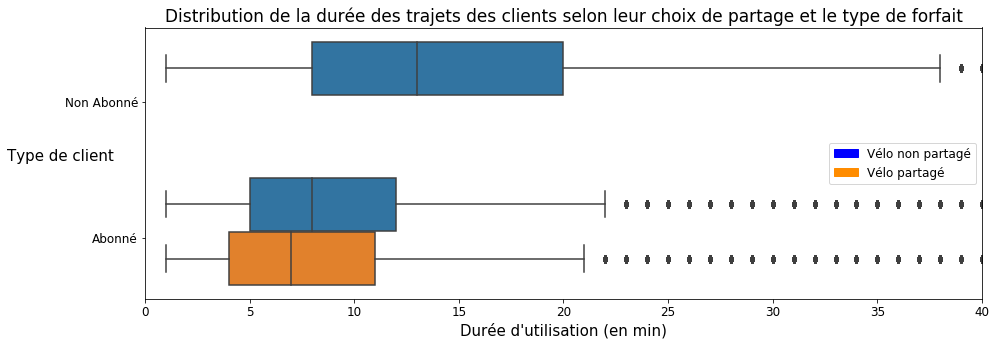

In [13]:
plt.figure(figsize = [15,5]) 
sb.boxplot(data=df, x='duration_min', y='user_type', hue = 'bike_share_for_all_trip')
sb.color_palette('bright')

#LEGENDE
Not_sharing = mpatches.Patch(color='blue', label='Vélo non partagé')
Sharing = mpatches.Patch(color='darkorange', label='Vélo partagé')
plt.legend(handles=[Not_sharing, Sharing],loc=5)

plt.xlim(0,40)

#Titre
plt.title('Distribution de la durée des trajets des clients selon leur choix de partage et le type de forfait',size=17)

#Abscisse
plt.xlabel("Durée d'utilisation (en min)",size=15)
plt.xlim(0,40)

#Ordonnée
locations = np.arange(2)  + 0.10 / 2
labels = ['Non Abonné', 'Abonné']
plt.yticks(locations, labels)
plt.ylabel('Type de client',rotation=0,size=15)

plt.show()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt